In [1]:
!pip install prince

In [2]:
!pip install -U sentence-transformers

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
import numpy as np
import prince
import pandas as pd
import matplotlib.pyplot as plt

'''
Variables: 
---------

corpus : list of documents
embeddings : documents embeddings of size NxM (N : number of documents, M : embedding dimension) 
red_emd : reduced embeddings matrix using dimentionality reduction
k : number of clusters
labels : documents labels
pred : list of clustering predicted clusters 

''';

In [4]:
def dim_red(mat, p):
    '''
    Perform dimensionality reduction

    Input:
    -----
        mat : NxM list 
        p : number of dimensions to keep 
    Output:
    ------
        red_mat : NxP list such that p<<m
    '''
    
    red_mat = mat[:,:]
    red_mat = pd.DataFrame(red_mat)
    pca = prince.PCA(n_components=p)
    pca = pca.fit(red_mat)
    
    return pca.transform(red_mat)

In [9]:
def clust(mat, k):
    '''
    Perform clustering

    Input:
    -----
        mat : input list 
        k : number of cluster
    Output:
    ------
        pred : list of predicted labels
    '''
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    kmeans.fit(mat)
    pred = kmeans.labels_
    
    #pred = np.random.randint(k, size=len(corpus))
    
    return pred

In [ ]:
# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

# perform dimentionality reduction
red_emb = dim_red(embeddings, 20)

# perform clustering
pred = clust(red_emb, k)

# evaluate clustering results
nmi_score = normalized_mutual_info_score(pred,labels)
ari_score = adjusted_rand_score(pred,labels)

print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')

# Visualization

In [11]:
red_emb_plot = dim_red(embeddings, 2)

In [12]:
pred = clust(red_emb, k)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


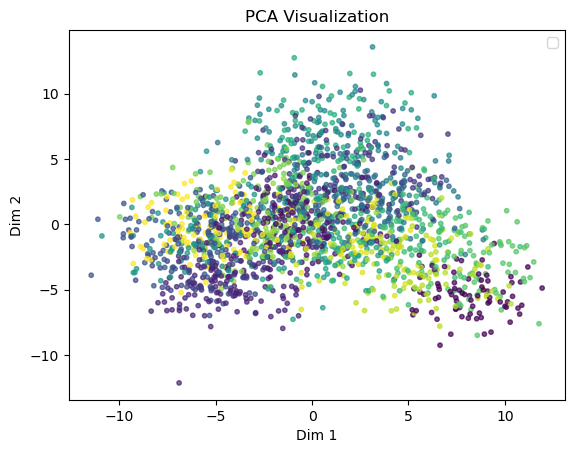

In [16]:
import matplotlib.pyplot as plt
# Plot the original data points and cluster centers
plt.scatter(red_emb_plot.values[:,0], red_emb_plot.values[:,1], c=pred, cmap='viridis', s=10, alpha=0.7)
plt.title('PCA Visualization')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')

plt.legend()
plt.show()